In [39]:
# Prepare the required packages

!pip install qiskit pylatexenc;
!pip install qiskit-aer;
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister;
from qiskit.quantum_info import Statevector, Operator;
from qiskit_aer import AerSimulator;
from qiskit import transpile;
from qiskit.visualization import plot_histogram;
import pylatexenc;
import matplotlib.pyplot as plt;
import numpy as np;
from qiskit.circuit.library import RZGate

![mini_proj_2_prob_3](https://drive.google.com/uc?id=1Xu7kYVS-crI-6B2owX6AD7acjgkoOxl4)



In [40]:
# Resources used:

# Lecture 8: Quantum Data-access Oracles and Quantum State Preparation
# Multiplexer explained from 42:02 to 49:10

# Lecture 9: Quantum State Preparation & Quantum Error Correction, part 1.
# n=2 explained from 7:52 to 27:03

# QC Boot Camp 4.ipynb last part

For $n=3$, we have:\
\
$\left| \psi \right\rangle=a\left|000\right\rangle+b\left|001\right\rangle+c\left|010\right\rangle+d\left|011\right\rangle+e\left|100\right\rangle+f\left|101\right\rangle+g\left|110\right\rangle+h\left|111\right\rangle$\
\
where $a$ to $h$ are all positive, and $||\psi||^2=a^2+b^2+...+h^2=1$.\
\
Factorize in tensor product sense, note that after factorized, rotations are done by each bit:\
($\color{black}{\text{black = firstbit}}$, $\color{blue}{\text{blue = secondbit}}$, $\color{red}{\text{red = thirdbit}}$)\

$$
\begin{align*}
  \left| \psi \right\rangle&=((a\left|0\right\rangle+e\left|1\right\rangle)\otimes\color{blue}{\left|0\right\rangle}+(c\left|0\right\rangle+g\left|1\right\rangle)\otimes\color{blue}{\left|1\right\rangle})\otimes\color{red}{\left|0\right\rangle}+((b\left|0\right\rangle+f\left|1\right\rangle)\otimes\color{blue}{\left|0\right\rangle}+(d\left|0\right\rangle+h\left|1\right\rangle)\otimes\color{blue}{\left|1\right\rangle})\otimes\color{red}{\left|1\right\rangle}\\
  &=((\cos\bigg(\frac{\theta_{100}}{2}\bigg)\left|0\right\rangle+\sin\bigg(\frac{\theta_{100}}{2}\bigg)\left|1\right\rangle)\otimes\color{blue}{\cos\bigg(\frac{\theta_{10}}{2}\bigg)\left|0\right\rangle}+\\
  &\hspace{1cm}(\cos\bigg(\frac{\theta_{110}}{2}\bigg)\left|0\right\rangle+\sin\bigg(\frac{\theta_{110}}{2}\bigg)\left|1\right\rangle)\otimes\color{blue}{\sin\bigg(\frac{\theta_{10}}{2}\bigg)\left|1\right\rangle})\otimes\color{red}{\cos\bigg(\frac{\theta_{0}}{2}\bigg)\left|0\right\rangle}+\\
  &\hspace{1cm}((\cos\bigg(\frac{\theta_{101}}{2}\bigg)\left|0\right\rangle+\sin\bigg(\frac{\theta_{101}}{2}\bigg)\left|1\right\rangle)\otimes\color{blue}{\cos\bigg(\frac{\theta_{11}}{2}\bigg)\left|0\right\rangle}+\\
  &\hspace{1cm}(\cos\bigg(\frac{\theta_{111}}{2}\bigg)\left|0\right\rangle+\sin\bigg(\frac{\theta_{111}}{2}\bigg)\left|1\right\rangle)\otimes\color{blue}{\sin\bigg(\frac{\theta_{11}}{2}\bigg)\left|1\right\rangle})\otimes\color{red}{\sin\bigg(\frac{\theta_{0}}{2}\bigg)\left|1\right\rangle}\\
  &=\color{red}{\cos\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\cos\bigg(\frac{\theta_{10}}{2}\bigg)}\color{black}{\cos\bigg(\frac{\theta_{100}}{2}\bigg)}\left|000\right\rangle+\\
  &\hspace{1cm}\color{red}{\cos\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\cos\bigg(\frac{\theta_{10}}{2}\bigg)}\color{black}{\sin\bigg(\frac{\theta_{100}}{2}\bigg)}\left|100\right\rangle+\\
  &\hspace{1cm}\color{red}{\cos\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\sin\bigg(\frac{\theta_{10}}{2}\bigg)}\color{black}{\cos\bigg(\frac{\theta_{110}}{2}\bigg)}\left|010\right\rangle+\\
  &\hspace{1cm}\color{red}{\cos\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\sin\bigg(\frac{\theta_{10}}{2}\bigg)}\color{black}{\sin\bigg(\frac{\theta_{110}}{2}\bigg)}\left|110\right\rangle+\\
  &\hspace{1cm}\color{red}{\sin\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\cos\bigg(\frac{\theta_{11}}{2}\bigg)}\color{black}{\cos\bigg(\frac{\theta_{101}}{2}\bigg)}\left|001\right\rangle+\\
  &\hspace{1cm}\color{red}{\sin\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\cos\bigg(\frac{\theta_{11}}{2}\bigg)}\color{black}{\sin\bigg(\frac{\theta_{101}}{2}\bigg)}\left|101\right\rangle+\\
  &\hspace{1cm}\color{red}{\sin\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\sin\bigg(\frac{\theta_{11}}{2}\bigg)}\color{black}{\cos\bigg(\frac{\theta_{111}}{2}\bigg)}\left|011\right\rangle+\\
  &\hspace{1cm}\color{red}{\sin\bigg(\frac{\theta_{0}}{2}\bigg)}\color{blue}{\sin\bigg(\frac{\theta_{11}}{2}\bigg)}\color{black}{\sin\bigg(\frac{\theta_{111}}{2}\bigg)}\left|111\right\rangle+\\
\end{align*}
$$



Looking at the basis states, we can see that $R_y(\theta_{100})$ is applied to the first bit (top wire) when the second and third bits are $00$, $R_y(\theta_{110})$ is applied when the second and third bits are $10$, $R_y(\theta_{101})$ is applied when the second and third bits are $01$, $R_y(\theta_{111})$ is applied when the second and third bits are $11$; then, $R_y(\theta_{10})$ is applied to the second bit (middle wire) when the third bit is $0$, $R_y(\theta_{11})$ is applied when the third bit is $1$; finally, $R_y(\theta_0)$ is applied to the last bit. Therefore a quantum gate can be constructed by using quantum multiplexers, with the $\theta$s defined below satisfying $\sin^2\theta+\cos^2\theta=1$ and $||\psi||^2=a^2+b^2+...+h^2=1$:


Table A:
$$\begin{array}{|c|c|c|} \hline
\cos(\frac{\theta_0}{2})=\sqrt{a^2+b^2+c^2+d^2} & \cos(\frac{\theta_{10}}{2})=\frac{\sqrt{a^2+b^2}}{\sqrt{a^2+b^2+c^2+d^2}} & \cos(\frac{\theta_{100}}{2})=\frac{a}{\sqrt{a^2+b^2}} \\ \hline
\text{same as above} & \text{same as above} & \sin(\frac{\theta_{100}}{2})=\frac{b}{\sqrt{a^2+b^2}} \\ \hline
\text{same as above} & \sin(\frac{\theta_{10}}{2})=\frac{\sqrt{c^2+d^2}}{\sqrt{a^2+b^2+c^2+d^2}} & \cos(\frac{\theta_{110}}{2})=\frac{c}{\sqrt{c^2+d^2}} \\ \hline
\text{same as above} & \text{same as above} & \sin(\frac{\theta_{110}}{2})=\frac{d}{\sqrt{c^2+d^2}} \\ \hline
\sin(\frac{\theta_0}{2})=\sqrt{e^2+f^2+g^2+h^2} & \cos(\frac{\theta_{11}}{2})=\frac{\sqrt{e^2+f^2}}{\sqrt{e^2+f^2+g^2+h^2}} & \cos(\frac{\theta_{101}}{2})=\frac{e}{\sqrt{e^2+f^2}} \\ \hline
\text{same as above} & \text{same as above} & \sin(\frac{\theta_{101}}{2})=\frac{f}{\sqrt{e^2+f^2}} \\ \hline
\text{same as above} & \sin(\frac{\theta_{11}}{2})=\frac{\sqrt{g^2+h^2}}{\sqrt{e^2+f^2+g^2+h^2}} & \cos(\frac{\theta_{111}}{2})=\frac{g}{\sqrt{g^2+h^2}} \\ \hline
\text{same as above} & \text{same as above} & \sin(\frac{\theta_{111}}{2})=\frac{h}{\sqrt{g^2+h^2}} \\ \hline
\end{array}$$

Suppose we are going to prepare a fixed state generated randomly:

In [55]:
import random

random.seed(1)

random_numbers = [random.randint(1, 100) for _ in range(8)]

psi = random_numbers / np.sqrt(np.dot(random_numbers, random_numbers))

np.linalg.norm(psi) # check the norm

1.0

In [42]:
# Create R_y gate using R_y = S'H(R_z)HS

def custom_R_y_gate(theta):

  quantum_register = QuantumRegister(size=1, name="x")

  qc_ry = QuantumCircuit(quantum_register)

  qc_ry.s(quantum_register[0])
  qc_ry.h(quantum_register[0])
  qc_ry.rz(theta, quantum_register[0])
  qc_ry.h(quantum_register[0])
  qc_ry.s(quantum_register[0])

  return qc_ry.to_gate(label="custom_R_y_gate")

In [43]:
theta_0 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:4]))))
theta_10 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:2]))) / np.sqrt(np.sum(np.square(psi[:4]))))
theta_11 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[4:6]))) / np.sqrt(np.sum(np.square(psi[4:8]))))
theta_100 = 2 * np.arccos(psi[0] / np.sqrt(np.sum(np.square(psi[:2]))))
theta_110 = 2 * np.arccos(psi[2] / np.sqrt(np.sum(np.square(psi[2:4]))))
theta_101 = 2 * np.arccos(psi[4] / np.sqrt(np.sum(np.square(psi[4:6]))))
theta_111 = 2 * np.arccos(psi[6] / np.sqrt(np.sum(np.square(psi[6:8]))))

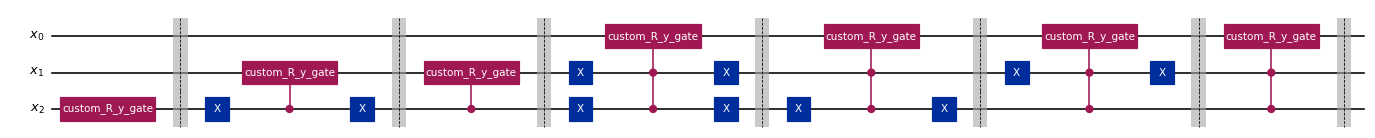

In [44]:
quantum_register = QuantumRegister(size=3, name="x")

qsp_circ = QuantumCircuit(quantum_register, name="Quantum State Preparation")

qsp_circ.append(custom_R_y_gate(theta_0), [quantum_register[2]])

qsp_circ.barrier()

qsp_circ.x(quantum_register[2])
mcry = custom_R_y_gate(theta_10).control(1)
qsp_circ.append(mcry, [quantum_register[2], quantum_register[1]])
qsp_circ.x(quantum_register[2])

qsp_circ.barrier()

mcry = custom_R_y_gate(theta_11).control(1)
qsp_circ.append(mcry, [quantum_register[2], quantum_register[1]])

qsp_circ.barrier()

qsp_circ.x(quantum_register[1])
qsp_circ.x(quantum_register[2])
mcry = custom_R_y_gate(theta_100).control(2)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])
qsp_circ.x(quantum_register[2])
qsp_circ.x(quantum_register[1])

qsp_circ.barrier()

qsp_circ.x(quantum_register[2])
mcry = custom_R_y_gate(theta_110).control(2)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])
qsp_circ.x(quantum_register[2])

qsp_circ.barrier()

qsp_circ.x(quantum_register[1])
mcry = custom_R_y_gate(theta_101).control(2)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])
qsp_circ.x(quantum_register[1])

qsp_circ.barrier()

mcry = custom_R_y_gate(theta_111).control(2)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])

qsp_circ.barrier()

qsp_circ.draw(output="mpl", scale = 0.8, fold = False)

In [56]:
def n3_quantum_state_prep(psi):

    theta_0 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:4]))))
    theta_10 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:2]))) / np.sqrt(np.sum(np.square(psi[:4]))))
    theta_11 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[4:6]))) / np.sqrt(np.sum(np.square(psi[4:8]))))
    theta_100 = 2 * np.arccos(psi[0] / np.sqrt(np.sum(np.square(psi[:2]))))
    theta_110 = 2 * np.arccos(psi[2] / np.sqrt(np.sum(np.square(psi[2:4]))))
    theta_101 = 2 * np.arccos(psi[4] / np.sqrt(np.sum(np.square(psi[4:6]))))
    theta_111 = 2 * np.arccos(psi[6] / np.sqrt(np.sum(np.square(psi[6:8]))))

    quantum_register = QuantumRegister(size=3, name="x")

    qsp_circ = QuantumCircuit(quantum_register, name="Quantum State Preparation")

    qsp_circ.append(custom_R_y_gate(theta_0), [quantum_register[2]])

    qsp_circ.x(quantum_register[2])
    mcry = custom_R_y_gate(theta_10).control(1)
    qsp_circ.append(mcry, [quantum_register[2], quantum_register[1]])
    qsp_circ.x(quantum_register[2])

    mcry = custom_R_y_gate(theta_11).control(1)
    qsp_circ.append(mcry, [quantum_register[2], quantum_register[1]])

    qsp_circ.x(quantum_register[1])
    qsp_circ.x(quantum_register[2])
    mcry = custom_R_y_gate(theta_100).control(2)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])
    qsp_circ.x(quantum_register[2])
    qsp_circ.x(quantum_register[1])

    qsp_circ.x(quantum_register[2])
    mcry = custom_R_y_gate(theta_110).control(2)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])
    qsp_circ.x(quantum_register[2])

    qsp_circ.x(quantum_register[1])
    mcry = custom_R_y_gate(theta_101).control(2)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])
    qsp_circ.x(quantum_register[1])

    mcry = custom_R_y_gate(theta_111).control(2)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[0]])

    psi_new = Statevector(qsp_circ).data

    return psi_new

In [57]:
n3_quantum_state_prep(psi)

array([0.10326596+2.74086309e-16j, 0.41880083+9.71445147e-17j,
       0.56222577+1.11022302e-16j, 0.05163298-3.12250226e-17j,
       0.18932092-1.38777878e-16j, 0.09179196-1.17961196e-16j,
       0.36716785-1.38777878e-16j, 0.56222577+2.22044605e-16j])

In [59]:
# Check the answer

np.round(np.real(n3_quantum_state_prep(psi)) - psi, 0)

array([-0., -0., -0.,  0., -0., -0., -0., -0.])

Table A above can be extended easily when $n=4$:\
\
Table B ($n=4$), where only first row is given to demonstrate, other rows are easy to find:
\
\
![n_equals_4](https://drive.google.com/uc?id=1oToStd8b5iZq6RhwlEky_G91JA2POcFI)


In [61]:
import random

random.seed(1)

random_numbers = [random.randint(1, 100) for _ in range(16)]

psi = random_numbers / np.sqrt(np.dot(random_numbers, random_numbers))

np.linalg.norm(psi) # check the norm

0.9999999999999999

In [50]:
theta_0 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:8]))))
theta_10 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:4]))) / np.sqrt(np.sum(np.square(psi[:8]))))
theta_11 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[8:12]))) / np.sqrt(np.sum(np.square(psi[8:16]))))
theta_100 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:2]))) / np.sqrt(np.sum(np.square(psi[:4]))))
theta_110 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[4:6]))) / np.sqrt(np.sum(np.square(psi[4:8]))))
theta_101 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[8:10]))) / np.sqrt(np.sum(np.square(psi[8:12]))))
theta_111 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[12:14]))) / np.sqrt(np.sum(np.square(psi[12:16]))))
theta_1000 = 2 * np.arccos(psi[0] / np.sqrt(np.sum(np.square(psi[:2]))))
theta_1100 = 2 * np.arccos(psi[2] / np.sqrt(np.sum(np.square(psi[2:4]))))
theta_1010 = 2 * np.arccos(psi[4] / np.sqrt(np.sum(np.square(psi[4:6]))))
theta_1110 = 2 * np.arccos(psi[6] / np.sqrt(np.sum(np.square(psi[6:8]))))
theta_1001 = 2 * np.arccos(psi[8] / np.sqrt(np.sum(np.square(psi[8:10]))))
theta_1101 = 2 * np.arccos(psi[10] / np.sqrt(np.sum(np.square(psi[10:12]))))
theta_1011 = 2 * np.arccos(psi[12] / np.sqrt(np.sum(np.square(psi[12:14]))))
theta_1111 = 2 * np.arccos(psi[14] / np.sqrt(np.sum(np.square(psi[14:16]))))

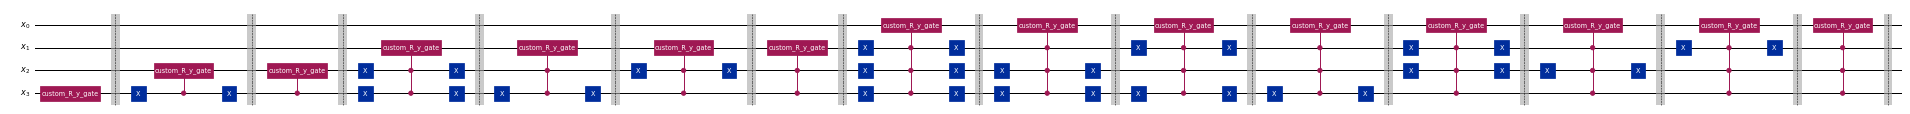

In [51]:
quantum_register = QuantumRegister(size=4, name="x")

qsp_circ = QuantumCircuit(quantum_register, name="Quantum State Preparation")

qsp_circ.append(custom_R_y_gate(theta_0), [quantum_register[3]])

qsp_circ.barrier()

qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_10).control(1)
qsp_circ.append(mcry, [quantum_register[3], quantum_register[2]])
qsp_circ.x(quantum_register[3])

qsp_circ.barrier()

mcry = custom_R_y_gate(theta_11).control(1)
qsp_circ.append(mcry, [quantum_register[3], quantum_register[2]])

qsp_circ.barrier()

qsp_circ.x(quantum_register[2])
qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_100).control(2)
qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])
qsp_circ.x(quantum_register[3])
qsp_circ.x(quantum_register[2])

qsp_circ.barrier()

qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_110).control(2)
qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])
qsp_circ.x(quantum_register[3])

qsp_circ.barrier()

qsp_circ.x(quantum_register[2])
mcry = custom_R_y_gate(theta_101).control(2)
qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])
qsp_circ.x(quantum_register[2])

qsp_circ.barrier()

mcry = custom_R_y_gate(theta_111).control(2)
qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])

qsp_circ.barrier()

qsp_circ.x(quantum_register[1])
qsp_circ.x(quantum_register[2])
qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_1000).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[3])
qsp_circ.x(quantum_register[2])
qsp_circ.x(quantum_register[1])

qsp_circ.barrier()

qsp_circ.x(quantum_register[2])
qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_1100).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[3])
qsp_circ.x(quantum_register[2])

qsp_circ.barrier()

qsp_circ.x(quantum_register[1])
qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_1010).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[3])
qsp_circ.x(quantum_register[1])

qsp_circ.barrier()

qsp_circ.x(quantum_register[3])
mcry = custom_R_y_gate(theta_1110).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[3])

qsp_circ.barrier()

qsp_circ.x(quantum_register[1])
qsp_circ.x(quantum_register[2])
mcry = custom_R_y_gate(theta_1001).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[2])
qsp_circ.x(quantum_register[1])

qsp_circ.barrier()

qsp_circ.x(quantum_register[2])
mcry = custom_R_y_gate(theta_1101).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[2])

qsp_circ.barrier()

qsp_circ.x(quantum_register[1])
mcry = custom_R_y_gate(theta_1011).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
qsp_circ.x(quantum_register[1])

qsp_circ.barrier()

mcry = custom_R_y_gate(theta_1111).control(3)
qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])

qsp_circ.barrier()

qsp_circ.draw(output="mpl", scale=0.5, fold=False)

In [62]:
def n4_quantum_state_prep_circuit(psi):

    theta_0 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:8]))))
    theta_10 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:4]))) / np.sqrt(np.sum(np.square(psi[:8]))))
    theta_11 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[8:12]))) / np.sqrt(np.sum(np.square(psi[8:16]))))
    theta_100 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[:2]))) / np.sqrt(np.sum(np.square(psi[:4]))))
    theta_110 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[4:6]))) / np.sqrt(np.sum(np.square(psi[4:8]))))
    theta_101 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[8:10]))) / np.sqrt(np.sum(np.square(psi[8:12]))))
    theta_111 = 2 * np.arccos(np.sqrt(np.sum(np.square(psi[12:14]))) / np.sqrt(np.sum(np.square(psi[12:16]))))
    theta_1000 = 2 * np.arccos(psi[0] / np.sqrt(np.sum(np.square(psi[:2]))))
    theta_1100 = 2 * np.arccos(psi[2] / np.sqrt(np.sum(np.square(psi[2:4]))))
    theta_1010 = 2 * np.arccos(psi[4] / np.sqrt(np.sum(np.square(psi[4:6]))))
    theta_1110 = 2 * np.arccos(psi[6] / np.sqrt(np.sum(np.square(psi[6:8]))))
    theta_1001 = 2 * np.arccos(psi[8] / np.sqrt(np.sum(np.square(psi[8:10]))))
    theta_1101 = 2 * np.arccos(psi[10] / np.sqrt(np.sum(np.square(psi[10:12]))))
    theta_1011 = 2 * np.arccos(psi[12] / np.sqrt(np.sum(np.square(psi[12:14]))))
    theta_1111 = 2 * np.arccos(psi[14] / np.sqrt(np.sum(np.square(psi[14:16]))))

    quantum_register = QuantumRegister(size=4, name="x")

    qsp_circ = QuantumCircuit(quantum_register, name="Quantum State Preparation")

    qsp_circ.append(custom_R_y_gate(theta_0), [quantum_register[3]])

    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_10).control(1)
    qsp_circ.append(mcry, [quantum_register[3], quantum_register[2]])
    qsp_circ.x(quantum_register[3])

    mcry = custom_R_y_gate(theta_11).control(1)
    qsp_circ.append(mcry, [quantum_register[3], quantum_register[2]])

    qsp_circ.x(quantum_register[2])
    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_100).control(2)
    qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])
    qsp_circ.x(quantum_register[3])
    qsp_circ.x(quantum_register[2])

    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_110).control(2)
    qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])
    qsp_circ.x(quantum_register[3])

    qsp_circ.x(quantum_register[2])
    mcry = custom_R_y_gate(theta_101).control(2)
    qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])
    qsp_circ.x(quantum_register[2])

    mcry = custom_R_y_gate(theta_111).control(2)
    qsp_circ.append(mcry, [quantum_register[2], quantum_register[3], quantum_register[1]])

    qsp_circ.x(quantum_register[1])
    qsp_circ.x(quantum_register[2])
    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_1000).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[3])
    qsp_circ.x(quantum_register[2])
    qsp_circ.x(quantum_register[1])

    qsp_circ.x(quantum_register[2])
    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_1100).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[3])
    qsp_circ.x(quantum_register[2])

    qsp_circ.x(quantum_register[1])
    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_1010).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[3])
    qsp_circ.x(quantum_register[1])

    qsp_circ.x(quantum_register[3])
    mcry = custom_R_y_gate(theta_1110).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[3])

    qsp_circ.x(quantum_register[1])
    qsp_circ.x(quantum_register[2])
    mcry = custom_R_y_gate(theta_1001).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[2])
    qsp_circ.x(quantum_register[1])

    qsp_circ.x(quantum_register[2])
    mcry = custom_R_y_gate(theta_1101).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[2])

    qsp_circ.x(quantum_register[1])
    mcry = custom_R_y_gate(theta_1011).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])
    qsp_circ.x(quantum_register[1])

    mcry = custom_R_y_gate(theta_1111).control(3)
    qsp_circ.append(mcry, [quantum_register[1], quantum_register[2], quantum_register[3], quantum_register[0]])

    psi_new = Statevector(qsp_circ).data

    return psi_new

In [63]:
# Check the answer

np.round(np.real(n4_quantum_state_prep_circuit(psi)) - psi, 0)

array([-0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0.])